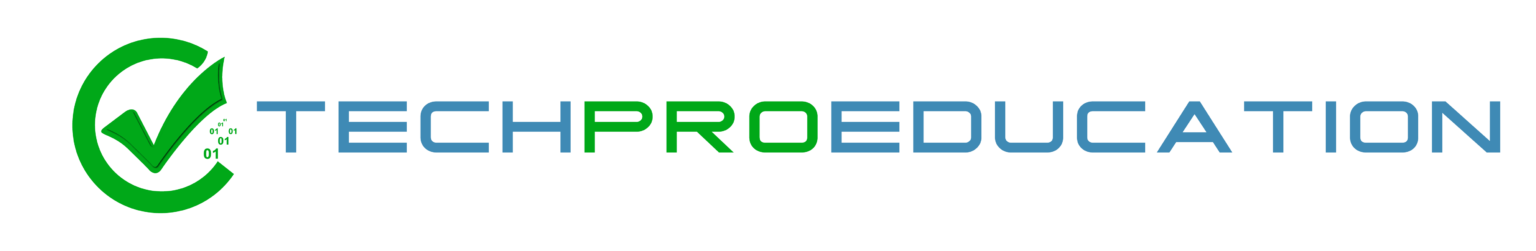

# WELCOME!

**Overview**

The data has been split into two groups:

- training set (train.csv)
- test set (test.csv)

**The training set** should be used to build your machine learning models. For the training set, we provide the outcome (also known as the “ground truth”) for each passenger. Your model will be based on “features” like passengers’ gender and class. You can also use feature engineering to create new features.

**The test set** should be used to see how well your model performs on unseen data. For the test set, we do not provide the ground truth for each passenger. It is your job to predict these outcomes. For each passenger in the test set, use the model you trained to predict whether or not they survived the sinking of the Titanic.

We also include gender_submission.csv, a set of predictions that assume all and only female passengers survive, as an example of what a submission file should look like.

**Data Dictionary**

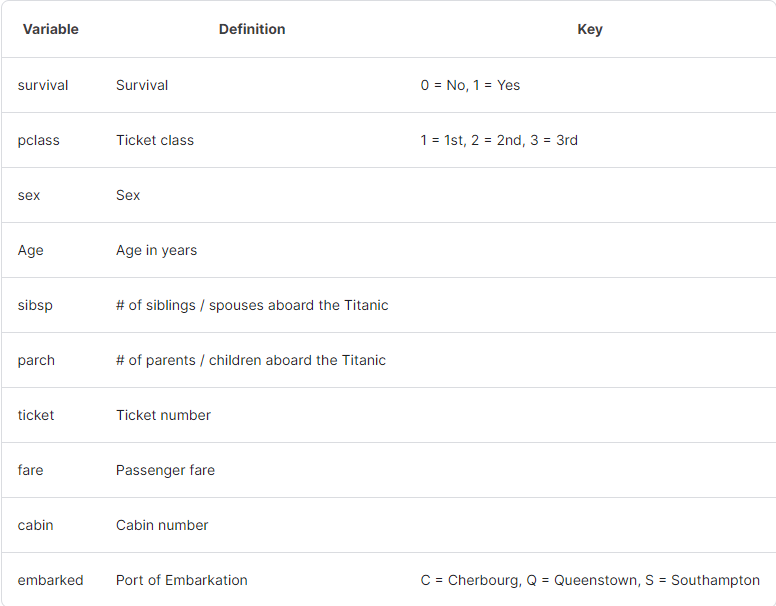

**Variable Notes**

pclass: A proxy for socio-economic status (SES)

1st = Upper

2nd = Middle

3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...

Sibling = brother, sister, stepbrother, stepsister

Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...

Parent = mother, father

Child = daughter, son, stepdaughter, stepson

Some children travelled only with a nanny, therefore parch=0 for them.

# Exploratory Data Analysis

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score,f1_score, classification_report,confusion_matrix
from sklearn.metrics import  recall_score, precision_score, roc_auc_score, auc
from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve, plot_roc_curve
from sklearn.model_selection import train_test_split
from sklearn.model_selection import  GridSearchCV
from yellowbrick.classifier import ClassPredictionError, ROCAUC
from sklearn.pipeline  import Pipeline
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.model_selection import cross_val_score, cross_validate
from xgboost import XGBClassifier

plt.rcParams["figure.figsize"] = (10,6)

import warnings
warnings.filterwarnings('ignore')
warnings.warn("this will not show")

pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)

## Load Dataset

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')


test_ids = test['PassengerId']

## Feature Engineering 

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [7]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [8]:
train.describe(include="object").T

,count,unique,top,freq
Name,891,891,"Braund, Mr. Owen Harris",1
Sex,891,2,male,577
Ticket,891,681,347082,7
Cabin,204,147,B96 B98,4
Embarked,889,3,S,644


In [9]:
train.duplicated().sum()

0

In [10]:
test.duplicated().sum()

0

In [11]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

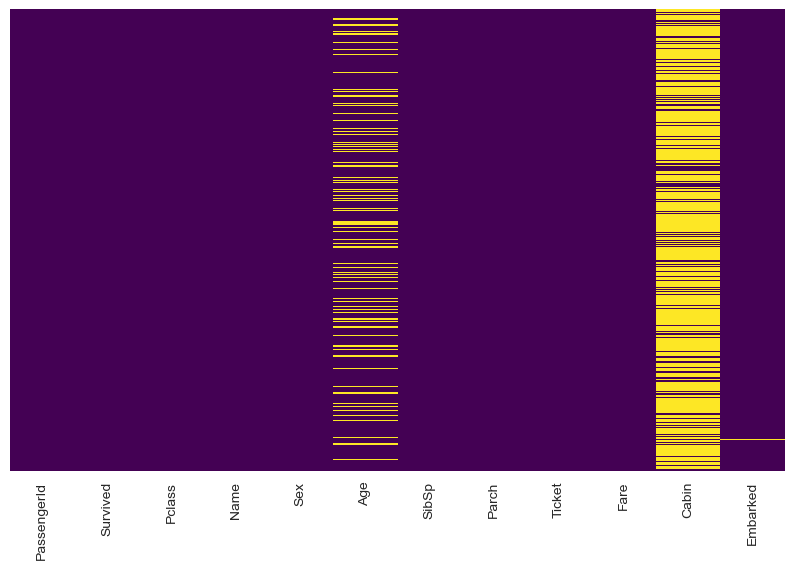

In [12]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis');

In [13]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

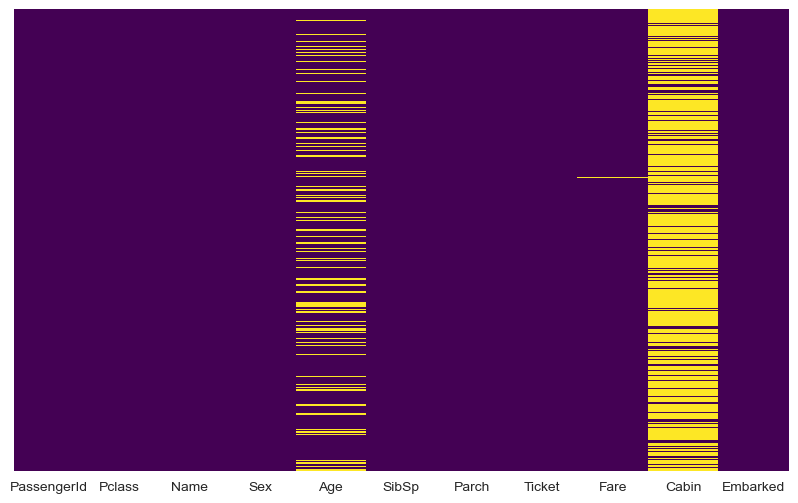

In [14]:
sns.heatmap(test.isnull(), yticklabels=False, cbar=False, cmap='viridis');

In [15]:
def dropping(data):
    data=data.drop(columns=['PassengerId', 'Ticket', 'Cabin'])
    data.Embarked.fillna('U', inplace=True)
    return data

In [16]:
train = dropping(train)
test= dropping(test)

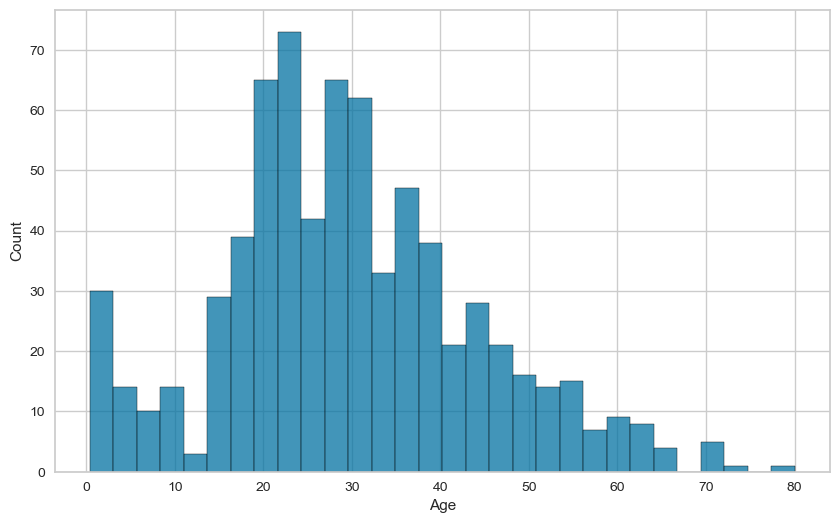

In [17]:
sns.histplot(data=train, x='Age', kde=False, bins=30);

In [18]:
train.groupby(['Pclass', 'Sex']).Age.median()

# yaşlıların birinci sınıfta olmayı tercih ettikleri ve sınıf kalitesi düştükçe yaşın ortalamasının da
# düştüğü şeklinde yorumlanabilir. 

Pclass  Sex   
1       female    35.0
        male      40.0
2       female    28.0
        male      30.0
3       female    21.5
        male      25.0
Name: Age, dtype: float64

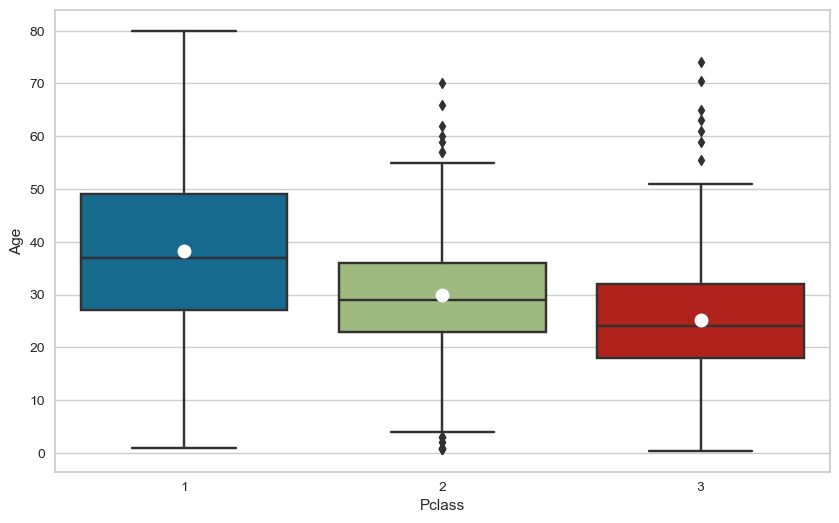

In [19]:
sns.boxplot(data=train, 
            x='Pclass', 
            y='Age', 
            showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                       "markersize":"10"});

In [23]:
print(train[(train['Age'].isnull()) & (train['Sex']=='female')]['Name'].to_markdown())

# Yaş özelliğinde boş değerlere karşılık gelen tüm kadın isimlerini görelim
# Kadın yolcuların 'miss' mı yoksa 'mrs' mı olduğunu tespit edersek yaşları hakkında daha iyi tahminde bulunabiliriz.

|     | Name                                               |
|----:|:---------------------------------------------------|
|  19 | Masselmani, Mrs. Fatima                            |
|  28 | O'Dwyer, Miss. Ellen "Nellie"                      |
|  31 | Spencer, Mrs. William Augustus (Marie Eugenie)     |
|  32 | Glynn, Miss. Mary Agatha                           |
|  47 | O'Driscoll, Miss. Bridget                          |
|  82 | McDermott, Miss. Brigdet Delia                     |
| 109 | Moran, Miss. Bertha                                |
| 128 | Peter, Miss. Anna                                  |
| 140 | Boulos, Mrs. Joseph (Sultana)                      |
| 166 | Chibnall, Mrs. (Edith Martha Bowerman)             |
| 180 | Sage, Miss. Constance Gladys                       |
| 186 | O'Brien, Mrs. Thomas (Johanna "Hannah" Godfrey)    |
| 198 | Madigan, Miss. Margaret "Maggie"                   |
| 229 | Lefebre, Miss. Mathilde                            |
| 235 | Harknett, Miss. 

In [24]:
def filling(data):
    data['Name']=data['Name'].apply(lambda x: 'Miss' if 'Miss.' in x else ('Mrs' if 'Mrs.' in x else 'Mr'))
    return data

# Ad sütununu üç değere sabitledim; Miss, Mrs ve Mr
# Bir sonraki adımda, Yaş sütununun boş hücrelerini, hangi değere karşılık geliyorsa, ortalama yaş ile dolduracağım

In [25]:
filling(train)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,Mr,male,22.00,1,0,7.2500,S
1,1,1,Mrs,female,38.00,1,0,71.2833,C
2,1,3,Miss,female,26.00,0,0,7.9250,S
3,1,1,Mrs,female,35.00,1,0,53.1000,S
4,0,3,Mr,male,35.00,0,0,8.0500,S
5,0,3,Mr,male,NaN,0,0,8.4583,Q
6,0,1,Mr,male,54.00,0,0,51.8625,S
7,0,3,Mr,male,2.00,3,1,21.0750,S
8,1,3,Mrs,female,27.00,0,2,11.1333,S
9,1,2,Mrs,female,14.00,1,0,30.0708,C


In [26]:
filling(test)

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,Mr,male,34.50,0,0,7.8292,Q
1,3,Mrs,female,47.00,1,0,7.0000,S
2,2,Mr,male,62.00,0,0,9.6875,Q
3,3,Mr,male,27.00,0,0,8.6625,S
4,3,Mrs,female,22.00,1,1,12.2875,S
5,3,Mr,male,14.00,0,0,9.2250,S
6,3,Miss,female,30.00,0,0,7.6292,Q
7,2,Mr,male,26.00,1,1,29.0000,S
8,3,Mrs,female,18.00,0,0,7.2292,C
9,3,Mr,male,21.00,2,0,24.1500,S


In [27]:
train.loc[train['Age'].isnull()]['Name']

5        Mr
17       Mr
19      Mrs
26       Mr
28     Miss
29       Mr
31      Mrs
32     Miss
36       Mr
42       Mr
45       Mr
46       Mr
47     Miss
48       Mr
55       Mr
64       Mr
65       Mr
76       Mr
77       Mr
82     Miss
87       Mr
95       Mr
101      Mr
107      Mr
109    Miss
121      Mr
126      Mr
128    Miss
140     Mrs
154      Mr
158      Mr
159      Mr
166     Mrs
168      Mr
176      Mr
180    Miss
181      Mr
185      Mr
186     Mrs
196      Mr
198    Miss
201      Mr
214      Mr
223      Mr
229    Miss
235    Miss
240    Miss
241    Miss
250      Mr
256     Mrs
260      Mr
264    Miss
270      Mr
274    Miss
277      Mr
284      Mr
295      Mr
298      Mr
300    Miss
301      Mr
303    Miss
304      Mr
306    Miss
324      Mr
330    Miss
334     Mrs
335      Mr
347     Mrs
351      Mr
354      Mr
358    Miss
359    Miss
364      Mr
367     Mrs
368    Miss
375     Mrs
384      Mr
388      Mr
409    Miss
410      Mr
411      Mr
413      Mr
415     Mrs
420 

In [28]:
train.loc[train['Name']=='Miss']['Age'].mean()

21.773972602739725

In [29]:
train.loc[train['Name']=='Mrs']['Age'].mean()

35.898148148148145

In [30]:
train.loc[train['Name']=='Mr']['Age'].mean()

30.759065217391303

In [31]:
def filling2(data):
    a=['Miss', 'Mrs', 'Mr']
    b =[22, 36, 31]
    for i, k in zip(a,b):
        data.loc[data['Name']==i, 'Age'] = data.loc[data['Name']==i]['Age'].fillna(k)
    return data
        
filling2(train)
filling2(test)

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,Mr,male,34.50,0,0,7.8292,Q
1,3,Mrs,female,47.00,1,0,7.0000,S
2,2,Mr,male,62.00,0,0,9.6875,Q
3,3,Mr,male,27.00,0,0,8.6625,S
4,3,Mrs,female,22.00,1,1,12.2875,S
5,3,Mr,male,14.00,0,0,9.2250,S
6,3,Miss,female,30.00,0,0,7.6292,Q
7,2,Mr,male,26.00,1,1,29.0000,S
8,3,Mrs,female,18.00,0,0,7.2292,C
9,3,Mr,male,21.00,2,0,24.1500,S


In [32]:
train.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [33]:
test['Fare'] = test['Fare'].fillna(test['Fare'].mean())

In [34]:
test.isnull().sum()

Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [35]:
train.drop(columns='Name', inplace=True)
test.drop(columns='Name', inplace=True)

In [36]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [37]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


In [38]:
train.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [39]:
gender_submission=pd.read_csv("gender_submission.csv")
gender_submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


# Encoding

Tree based modellerle ilgili yapılan akademik bir çalışmada;

1. Ordinal encoder scorlarının one hot encoder scorlarına göre ortalama %1, %2 civarlarında daha iyi olduğu,

2. Eğitim esnasında ordinal encoderın, one hot encodera göre 2,5 kat daha hızlı çalıştığı,

3. Doğru feature importance elde edebilmek için Ordinal encoder kullanılması gerektiği görülmüştür.

Tree based modellerde amacımız sadece skor almak ise hem one hot encoder hem de ordinal encoder kullanabiliriz. 

Ancak, yukarıda bahsettiğimiz avantajlarından dolayı tree based modellerde ordinal encoder kullanacağız.

Eğer amacınız sadece skor almaksa ordinal encoder veya one hot encoder kullanabileceğimiz söylemiştik.

In [40]:
cols=['Sex', 'Embarked']
enc1=OrdinalEncoder(categories=[['female', 'male']])
enc2=OrdinalEncoder(categories=[['S','C','Q','U']])
enc = [enc1, enc2]
for i, k in zip(cols, enc):
    train[i]=k.fit_transform(train[[i]])
    test[i]=k.transform(test[[i]])

In [41]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1.0,22.0,1,0,7.2500,0.0
1,1,1,0.0,38.0,1,0,71.2833,1.0
2,1,3,0.0,26.0,0,0,7.9250,0.0
3,1,1,0.0,35.0,1,0,53.1000,0.0
4,0,3,1.0,35.0,0,0,8.0500,0.0


In [42]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1.0,34.5,0,0,7.8292,2.0
1,3,0.0,47.0,1,0,7.0000,0.0
2,2,1.0,62.0,0,0,9.6875,2.0
3,3,1.0,27.0,0,0,8.6625,0.0
4,3,0.0,22.0,1,1,12.2875,0.0


# Train | Test Split

In [43]:
X = train.drop(columns='Survived')
y = train['Survived']

In [44]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=101)

# Implement AdaBoost

adaboostclassifier her agacında train setindeki gözlem sayısı kadar gözlem olur ama her agaçta bu gözlemler değişir.

adaboostclassifier tahmin edemediği gözlemleri bir sonraki agaca bildirip bu gözlemlere daha fazla ağırlık verilmesini ister.

Bu ağırlıklandırmaya tahmin edilemeyen gözlemlerin sayısının bir sonraki agaçta artırılmasına denir. Tahmin edilen
gözlemlerin bazıları ise bir sonraki agaca aktarılmaz.

Sonraki agaçlardaki gözlemlerin ağırlıklandırılması learning rate ile düzenlenir.

In [45]:
ada = AdaBoostClassifier(random_state=101)
ada.fit(X_train, y_train)

AdaBoostClassifier(random_state=101)

In [46]:
prediction=ada.predict(X_test)
accuracy_score(y_test, prediction)

0.7932960893854749

## GridSearchCV

In [47]:
# agaç sayısı ile learning rate arasında herzman bir trade off vardır.

param_grid = {"n_estimators": [50, 100, 200], "learning_rate": [0.01, 0.1, 0.2, 0.5, 1.0]}

ada_model = AdaBoostClassifier()
ada_grid = GridSearchCV(ada_model, param_grid, scoring = "accuracy", verbose=2, n_jobs = -1, 
                        return_train_score=True)
ada_grid.fit(X_train, y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


GridSearchCV(estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2, 0.5, 1.0],
                         'n_estimators': [50, 100, 200]},
             return_train_score=True, scoring='accuracy', verbose=2)

In [48]:
ada_grid.best_params_

{'learning_rate': 0.2, 'n_estimators': 200}

In [49]:
ada_grid.best_score_

0.8090219639515415

In [50]:
y_pred_test = ada_grid.predict(X_test)
y_pred_train = ada_grid.predict(X_train)

In [51]:
ada_accuracy_test = accuracy_score(y_test, y_pred_test)
ada_accuracy_train = accuracy_score(y_train, y_pred_train)

ada_f1_test = f1_score(y_test, y_pred_test)
ada_f1_train = f1_score(y_train, y_pred_train)

ada_accuracy_test, ada_accuracy_train, ada_f1_test, ada_f1_train

(0.7932960893854749,
 0.8286516853932584,
 0.7482993197278912,
 0.7635658914728682)

In [52]:
print("TEST CM\n" , confusion_matrix(y_test, y_pred_test))
print("-*"*30)
print("TRAIN CM \n", confusion_matrix(y_train, y_pred_train))
print("-*"*30)
print("TEST REPORT \n", classification_report(y_test, y_pred_test))
print("-*"*30)
print("TRAIN REPORT \n", classification_report(y_train, y_pred_train))

TEST CM
 [[87 12]
 [25 55]]
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN CM 
 [[393  57]
 [ 65 197]]
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TEST REPORT 
               precision    recall  f1-score   support

           0       0.78      0.88      0.82        99
           1       0.82      0.69      0.75        80

    accuracy                           0.79       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.79      0.79       179

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT 
               precision    recall  f1-score   support

           0       0.86      0.87      0.87       450
           1       0.78      0.75      0.76       262

    accuracy                           0.83       712
   macro avg       0.82      0.81      0.81       712
weighted avg       0.83      0.83      0.83       712



## Prediction with Best Hyper Parameters

In [53]:
ada_test=GradientBoostingClassifier(
 learning_rate= 0.2,
 n_estimators= 100)

ada_test.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=0.2)

In [54]:
sub_pred1=ada_test.predict(test)
accuracy_score(gender_submission.Survived.values, sub_pred1)

0.8516746411483254

## Feature importances

In [55]:
model = AdaBoostClassifier(n_estimators=200, learning_rate=0.2, random_state=101)
model.fit(X_train, y_train)
model.feature_importances_

feats = pd.DataFrame(index=X.columns, data= model.feature_importances_, columns=['ada_importance'])
ada_imp_feats = feats.sort_values("ada_importance")
ada_imp_feats

,ada_importance
Embarked,0.035
Parch,0.040
Pclass,0.055
SibSp,0.085
Sex,0.100
Age,0.280
Fare,0.405


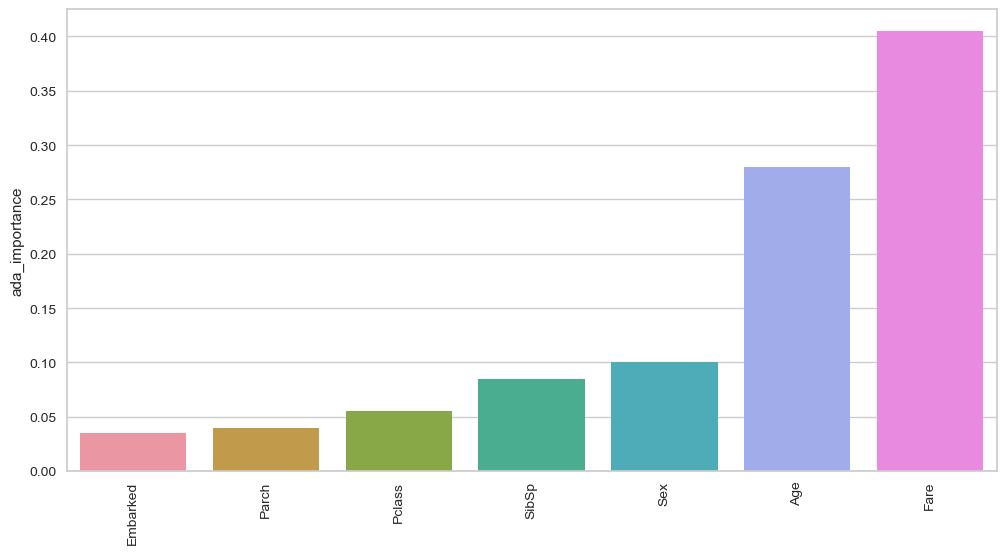

In [56]:
plt.figure(figsize=(12,6))
sns.barplot(data=ada_imp_feats ,x=ada_imp_feats.index, y='ada_importance')

plt.xticks(rotation=90);

## Evaluating ROC Curves, Precision Recall Curve

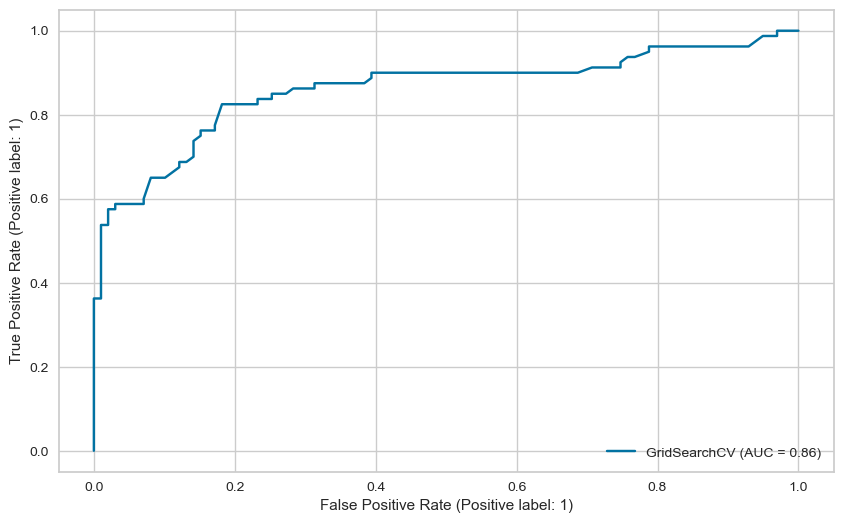

In [57]:
plot_roc_curve(ada_grid, X_test, y_test);

In [58]:
ada_auc = roc_auc_score(y_test, y_pred_test)
ada_auc

0.7831439393939393

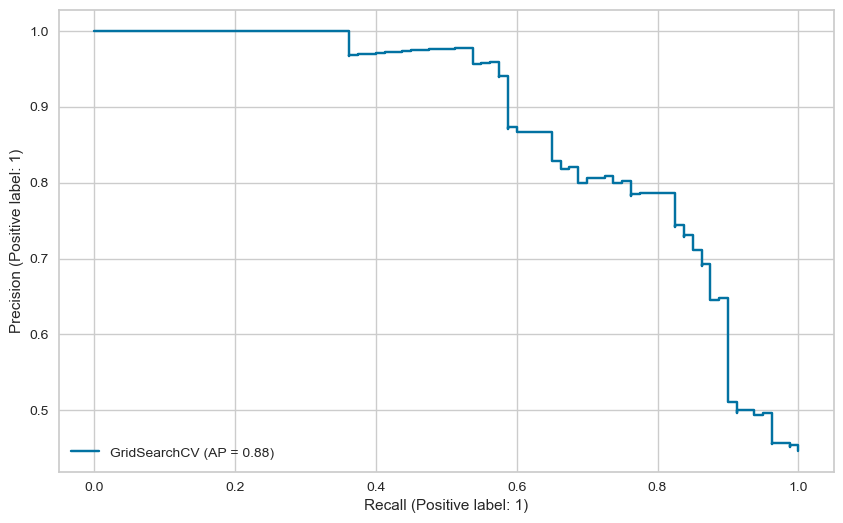

In [59]:
plot_precision_recall_curve(ada_grid, X_test, y_test);

In [60]:
y_pred_proba = ada_grid.predict_proba(X_test)[:, 1]

precision, recall, threshold = precision_recall_curve(y_test, y_pred_proba)

ada_prc = auc(recall, precision)
ada_prc

0.8754786801449447

# GradientBoosting

gradient boosting algortiması gradinet descent tabanlı linear modeller ile tree based modellerin kuvvetli yönlerinin
birlikte kullanıldığı tree based tabanlı bir modeldir.

Her bir gözlemi sabit bir olasılıktan başlatır. Datadaki 1 classları fazla ise bu olasılık 0.5'den büyük bir değer. 
0 classları fazla ise bu olasılık 0.5'den küçük bir değer olur. Bu olasılık değerini 1 ve 0 olasılık değrlerinden çıkararak
residual değerlerini buluruz. 

Model bu residual değerlerini 0'a yakınsatarak tahminlerini mükemmeleştirmeye çalışıyor.

In [61]:
grb = GradientBoostingClassifier(random_state=101)
grb.fit(X_train, y_train)

GradientBoostingClassifier(random_state=101)

In [62]:
prediction=grb.predict(X_test)
accuracy_score(y_test, prediction)

0.8324022346368715

## GridSearchCV

random foresttan farklı olarak:
1. Weak learner olabilmesi için default olarak max_dept=3 olarak düzenlenmiştir.
2. Tahmine her agacın ne kadar katkısı olacağı learning rate hyper parametresiyle düzenlenmiştir. defaultu 0.1'dir.
3. arka planda gradient descent tabanlı model kullanıldığından classificationda loss hyper parametresi vardır. Ve default 
olarak log_loss'tur. Gradient boosting log_loss functionı ile residualleri minimize etmeye çalışır.
4. yaprakların dallanma kriteri olarak (criterion) gini/entropy ve mse'nin karışımı olan friedman_mse kullanılır. Model
arka planda residualleri minimize etmeye çalıştığından regression modeli gibi çalışır.
5. subsample ile heragaçta ne kadar gözlem kullanılacağı tespit edilir. sub_sample=0.8 yaparsak her agaçta train datasından 
rasgele seçtiği 0.8 oranındaki gözlemleri kullanır. subsample düşürülürse overfitingi gidermeye yardımcı olur.
6. Diğer hyper_parametrelerin çoğu random forestle aynı veya benzerdir.

Agaç sayısı veya learning rate arasındaki trade off iyi ayarlanmalıdır. Yoksa overfitinge gider.

In [63]:
param_grid = {"n_estimators":[100, 200], "subsample":[0.5, 1], "max_features" : [None, 2, 3], "learning_rate": [0.001, 0.01], 'max_depth':[3,4,5]}

grb_model = GradientBoostingClassifier()
grb_grid = GridSearchCV(grb_model, param_grid, scoring = "accuracy", verbose=2, n_jobs = -1, 
                        return_train_score=True)
grb_grid.fit(X_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


GridSearchCV(estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01], 'max_depth': [3, 4, 5],
                         'max_features': [None, 2, 3],
                         'n_estimators': [100, 200], 'subsample': [0.5, 1]},
             return_train_score=True, scoring='accuracy', verbose=2)

In [64]:
grb_grid.best_params_

{'learning_rate': 0.01,
 'max_depth': 5,
 'max_features': 3,
 'n_estimators': 100,
 'subsample': 1}

In [65]:
grb_grid.best_score_

0.8314783807741554

In [66]:
y_pred_test = grb_grid.predict(X_test)
y_pred_train = grb_grid.predict(X_train)

In [67]:
grb_accuracy_test = accuracy_score(y_test, y_pred_test)
grb_accuracy_train = accuracy_score(y_train, y_pred_train)

grb_f1_test = f1_score(y_test, y_pred_test)
grb_f1_train = f1_score(y_train, y_pred_train)

grb_accuracy_test, grb_accuracy_train, grb_f1_test, grb_f1_train

(0.8044692737430168,
 0.8581460674157303,
 0.7244094488188976,
 0.7730337078651685)

In [68]:
print("TEST CM\n" , confusion_matrix(y_test, y_pred_test))
print("-*"*30)
print("TRAIN CM \n", confusion_matrix(y_train, y_pred_train))
print("-*"*30)
print("TEST REPORT \n", classification_report(y_test, y_pred_test))
print("-*"*30)
print("TRAIN REPORT \n", classification_report(y_train, y_pred_train))

TEST CM
 [[98  1]
 [34 46]]
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN CM 
 [[439  11]
 [ 90 172]]
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TEST REPORT 
               precision    recall  f1-score   support

           0       0.74      0.99      0.85        99
           1       0.98      0.57      0.72        80

    accuracy                           0.80       179
   macro avg       0.86      0.78      0.79       179
weighted avg       0.85      0.80      0.79       179

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT 
               precision    recall  f1-score   support

           0       0.83      0.98      0.90       450
           1       0.94      0.66      0.77       262

    accuracy                           0.86       712
   macro avg       0.88      0.82      0.83       712
weighted avg       0.87      0.86      0.85       712



## Prediction with Best Hyper Parameters

In [69]:
grb_f=GradientBoostingClassifier(
 learning_rate= 0.01,
 max_depth= 4,
 n_estimators= 100,
 max_features= 2,
 subsample= 1)
grb_f.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=0.01, max_depth=4, max_features=2,
                           subsample=1)

In [70]:
sub_pred2=grb_f.predict(test)
accuracy_score(gender_submission.Survived.values, sub_pred2)

0.8732057416267942

## Feature importances

In [71]:
model = GradientBoostingClassifier(
 learning_rate= 0.01,
 max_depth= 4,
 n_estimators= 100,
 max_features= 2,
 subsample= 1,
 random_state=101)

model.fit(X_train, y_train)

model.feature_importances_

feats = pd.DataFrame(index=X.columns, data=model.feature_importances_, columns=['grad_importance'])
grad_imp_feats = feats.sort_values("grad_importance")
grad_imp_feats

,grad_importance
Embarked,0.023792
Parch,0.026482
SibSp,0.042335
Age,0.105593
Fare,0.134197
Pclass,0.165611
Sex,0.501990


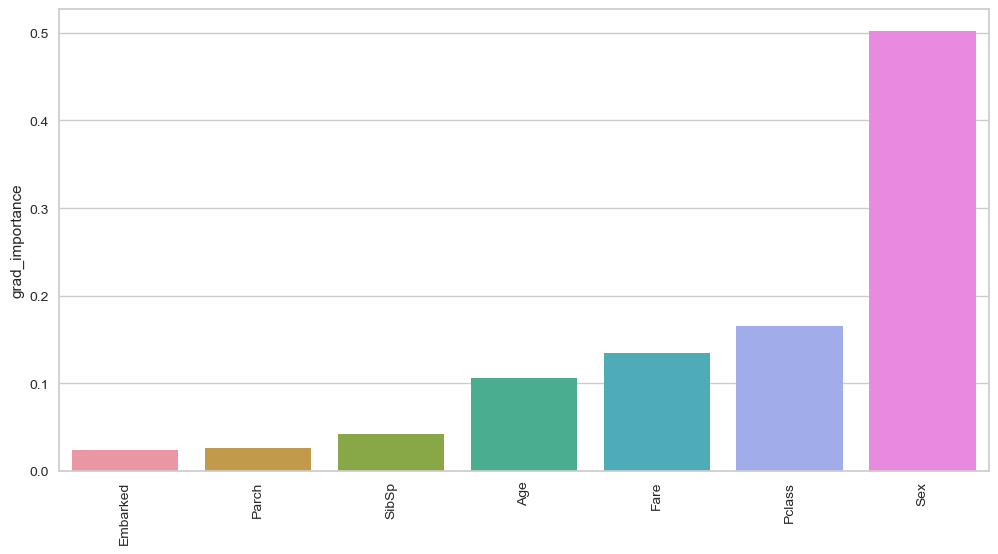

In [72]:
plt.figure(figsize=(12,6))
sns.barplot(data=grad_imp_feats, x=grad_imp_feats.index, y='grad_importance')

plt.xticks(rotation=90);

## Evaluating ROC Curves and AUC

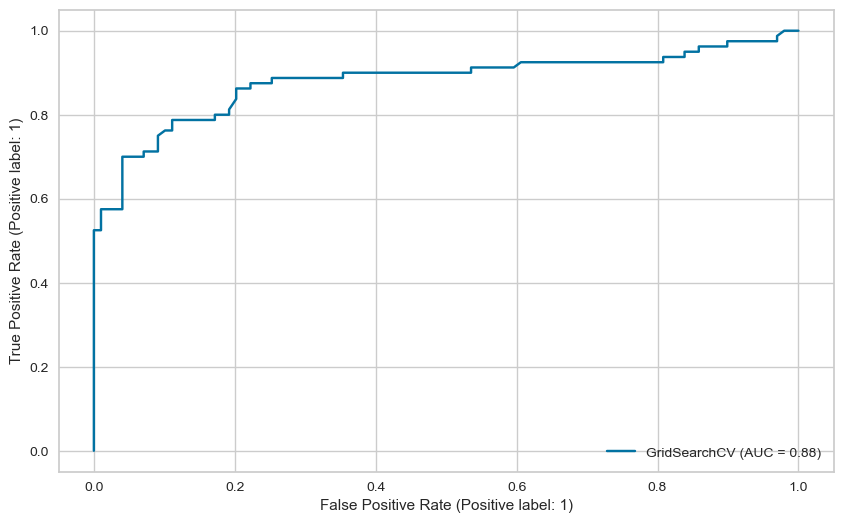

In [73]:
plot_roc_curve(grb_grid, X_test, y_test);

In [74]:
grb_auc = roc_auc_score(y_test, y_pred_test)
grb_auc

0.7824494949494949

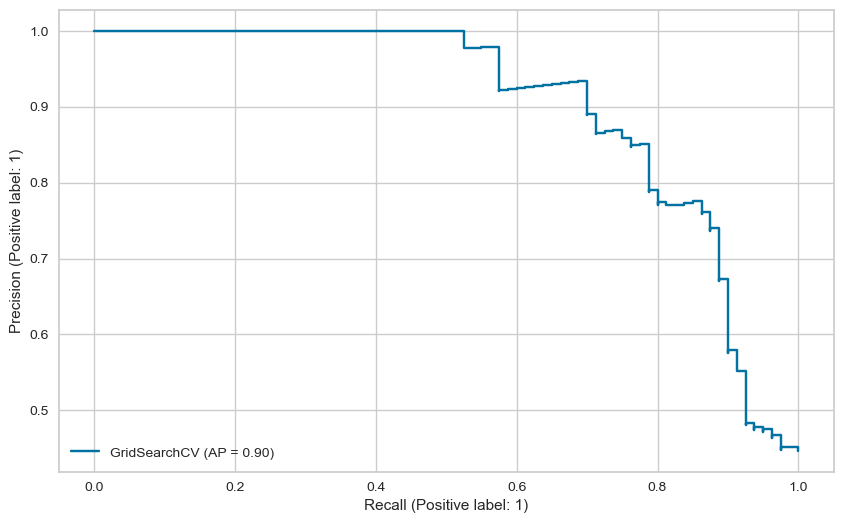

In [75]:
plot_precision_recall_curve(grb_grid, X_test, y_test);

In [76]:
y_pred_proba = grb_grid.predict_proba(X_test)[:, 1]

precision, recall, threshold = precision_recall_curve(y_test, y_pred_proba)

grb_prc = auc(recall, precision)
grb_prc

0.8997953792761877

# XGBoost

In [77]:
xgb = XGBClassifier(random_state=101)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=101, ...)

In [78]:
prediction=xgb.predict(X_test)
accuracy_score(y_test, prediction)

0.8212290502793296

## GridSearchCV

Hyper_parametreler:
    
base_score=0.5 model tüm gözlemleri default 0.5 olasılık değerinden başlatıp bu değeri 1 classları için 1.0 olasılığına,
0 classları için 0.0 olasılığına çekmeye çalışır.

max_depth=6, learning_rate=0.300000012 default değerleridir. Overfitinge en fazla etkisi olan parametrelerdir.

subsample=1 default olarak tüm agaçlarda tüm gözlemleri kullanır. overiftingi engellemek için 0.8 civarı değerler denenmeli.

subsample=0.8 demek tüm agaçlarda train seti içinden rastgele %80 oranında gözlem seç ve agaçlarda bunları kullan. Her agaç
için rastgele seçim tekrar yapılır. Bu işlem rassallığı artırır.

colsample_bytree=1 default değeri 1 dir. Her ağaç için kullanılması gereken feature sayısını belirler. datamız 20 featurdan
oluşuyorsa ve colsample_bytree=0.5 ise her agaç için 20 featura içinden rastgele seçilen  10 feature kullanır sadece.
rassalığı artırmak için kullanılır.

colsample_bylevel=1 default değeri 1'dir. colsample_bylevel=0.5 ise her agaç için kullanılacak featurlar (10 feature) içinden 
rastgele seçilen 5 feature her yaprak bölünmesi için kullınılır. Her yaprak bölünmesinde bu işlem tekrarlanır. rassalığı
artırmak için kullanılır.

gamma=0 default 0 dır. overfitingi engellemek için kullanılır. 0 ile + sonsuz arasında değer alabilir. Ayarlaması zordur.

min_child_weight=1 default 1'dir. overfitingi engellemek için kullanılır. Belli bir aralığı yoktur. Deneyip görmek lazım.

scale_pos_weight=1 ağılıklandırma parametresidir. Ancak sadece binary datalr için kullanılır. classların oranı 1/10 ise
azınlık sınıfı ağırlıklandırmak için bu parametre 10 olarak düzenlenmelidir.

reg_alpha = lasso, reg_lambda= ridge demek. default olarak ridge kullanılır.

Her agaçtaki dallanmalar için gini, entrop veya mse gibi metricleri kullanmaz bunun yerine hesaplamının içine regularizasyon 
parametresininde kullanıldığı similarity score diye bir parametre kullanır.

In [ ]:
param_grid = {"booster":['dart','gbtree'],"eta":[0.1,0.2],"n_estimators":[100,200],'max_depth':[3], "learning_rate": [0.1],
             "subsample":[0.5], "colsample_bytree":[0.5], 'reg_alpha':[0,1]}

xgb_model = XGBClassifier()
xgb_grid = GridSearchCV(xgb_model, param_grid, scoring = "accuracy", verbose=2, n_jobs = -1, 
                        return_train_score=True)
xgb_grid.fit(X_train, y_train)

In [80]:
xgb_grid.best_params_

{'booster': 'dart',
 'colsample_bytree': 0.5,
 'eta': 0.1,
 'learning_rate': 0.1,
 'max_depth': 3,
 'n_estimators': 200,
 'reg_alpha': 1,
 'subsample': 0.5}

In [81]:
xgb_grid.best_score_

0.8258642765685019

In [82]:
y_pred_test = xgb_grid.predict(X_test)
y_pred_train = xgb_grid.predict(X_train)

In [83]:
xgb_accuracy_test = accuracy_score(y_test, y_pred_test)
xgb_accuracy_train = accuracy_score(y_train, y_pred_train)

xgb_f1_test = f1_score(y_test, y_pred_test)
xgb_f1_train = f1_score(y_train, y_pred_train)

xgb_accuracy_test, xgb_accuracy_train, xgb_f1_test, xgb_f1_train

(0.8324022346368715,
 0.8693820224719101,
 0.7857142857142857,
 0.8090349075975359)

In [84]:
print("TEST CM\n" , confusion_matrix(y_test, y_pred_test))
print("-*"*30)
print("TRAIN CM \n", confusion_matrix(y_train, y_pred_train))
print("-*"*30)
print("TEST REPORT \n", classification_report(y_test, y_pred_test))
print("-*"*30)
print("TRAIN REPORT \n", classification_report(y_train, y_pred_train))

TEST CM
 [[94  5]
 [25 55]]
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN CM 
 [[422  28]
 [ 65 197]]
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TEST REPORT 
               precision    recall  f1-score   support

           0       0.79      0.95      0.86        99
           1       0.92      0.69      0.79        80

    accuracy                           0.83       179
   macro avg       0.85      0.82      0.82       179
weighted avg       0.85      0.83      0.83       179

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT 
               precision    recall  f1-score   support

           0       0.87      0.94      0.90       450
           1       0.88      0.75      0.81       262

    accuracy                           0.87       712
   macro avg       0.87      0.84      0.85       712
weighted avg       0.87      0.87      0.87       712



## Prediction with Best Hyper Parameters

In [85]:
xgb_test=XGBClassifier(booster='dart',
 eta=0.1,
 colsample_bytree= 0.5,
 learning_rate= 0.1,
 max_depth= 3,
 n_estimators= 100,
 reg_alpha= 0,
 subsample= 0.5)
xgb_test.fit(X_train,y_train)

XGBClassifier(base_score=None, booster='dart', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, early_stopping_rounds=None,
              enable_categorical=False, eta=0.1, eval_metric=None,
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, predictor=None, ...)

In [86]:
sub_pred3=xgb_test.predict(test)
accuracy_score(gender_submission.Survived.values, sub_pred3)

0.8827751196172249

## Feature importances

In [87]:
model = XGBClassifier(booster='gbtree',
 eta=0.1,
 colsample_bytree= 0.5,
 learning_rate= 0.1,
 max_depth= 3,
 n_estimators= 100,
 reg_alpha= 1,
 subsample= 0.5,
 random_state=101)

model.fit(X_train, y_train)

model.feature_importances_

feats = pd.DataFrame(index=X.columns, data=model.feature_importances_, columns=['xgb_importance'])
xgb_imp_feats = feats.sort_values("xgb_importance")
xgb_imp_feats

,xgb_importance
Parch,0.038102
SibSp,0.059015
Embarked,0.059793
Age,0.072547
Fare,0.076788
Pclass,0.181740
Sex,0.512014


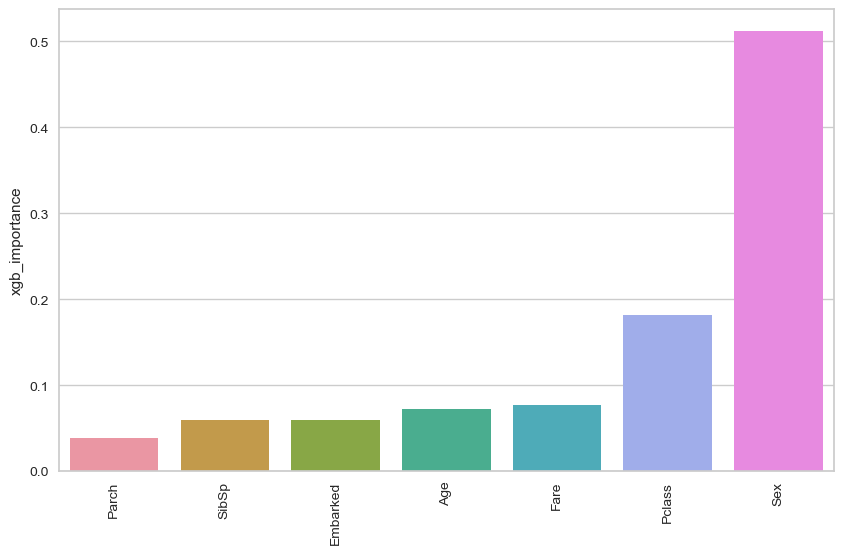

In [88]:
sns.barplot(data=xgb_imp_feats, x=xgb_imp_feats.index,y='xgb_importance')

plt.xticks(rotation=90);

## Feature importance comparison

In [89]:
pd.concat([ada_imp_feats, grad_imp_feats, xgb_imp_feats], axis=1)

,ada_importance,grad_importance,xgb_importance
Embarked,0.035,0.023792,0.059793
Parch,0.040,0.026482,0.038102
Pclass,0.055,0.165611,0.181740
SibSp,0.085,0.042335,0.059015
Sex,0.100,0.501990,0.512014
Age,0.280,0.105593,0.072547
Fare,0.405,0.134197,0.076788


## Evaluating ROC Curves and AUC

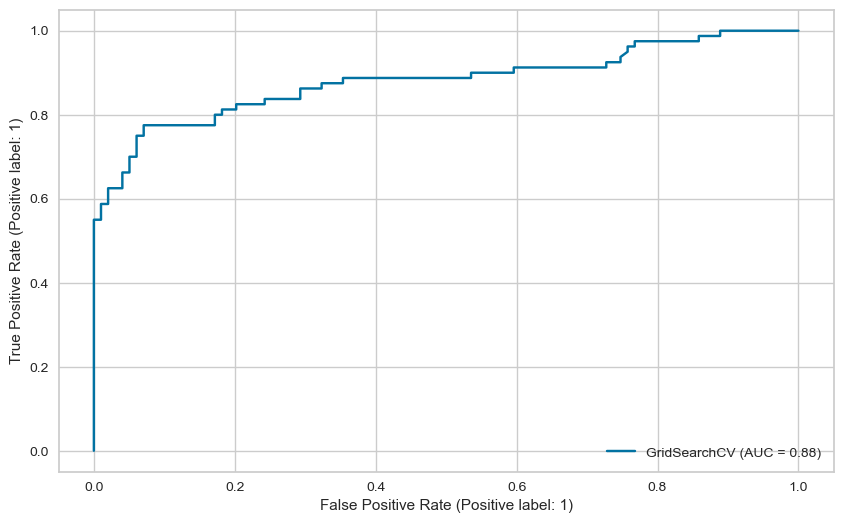

In [90]:
plot_roc_curve(xgb_grid, X_test, y_test);

In [91]:
xgb_auc = roc_auc_score(y_test, y_pred_test)
xgb_auc

0.8184974747474748

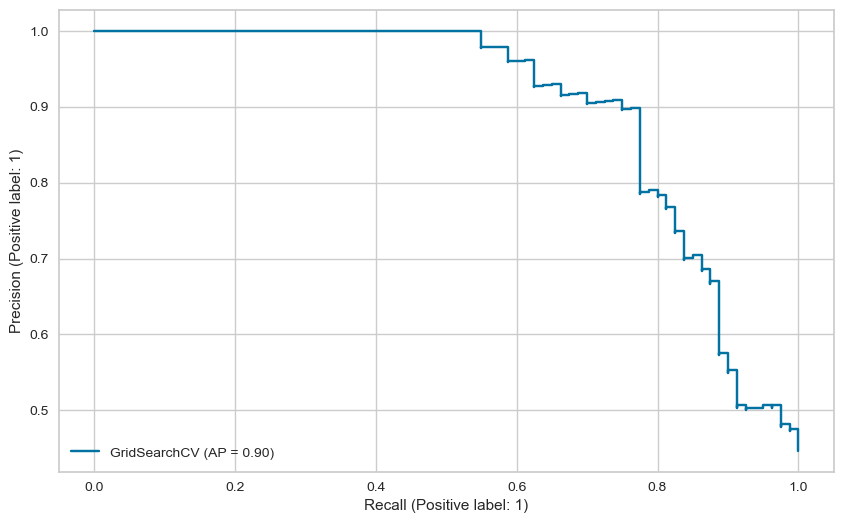

In [92]:
plot_precision_recall_curve(xgb_grid, X_test, y_test);

In [93]:
y_pred_proba = xgb_grid.predict_proba(X_test)[:, 1]

precision, recall, threshold = precision_recall_curve(y_test, y_pred_proba)

xgb_prc = auc(recall, precision)
xgb_prc

0.8997511647380602

# Compare The Models

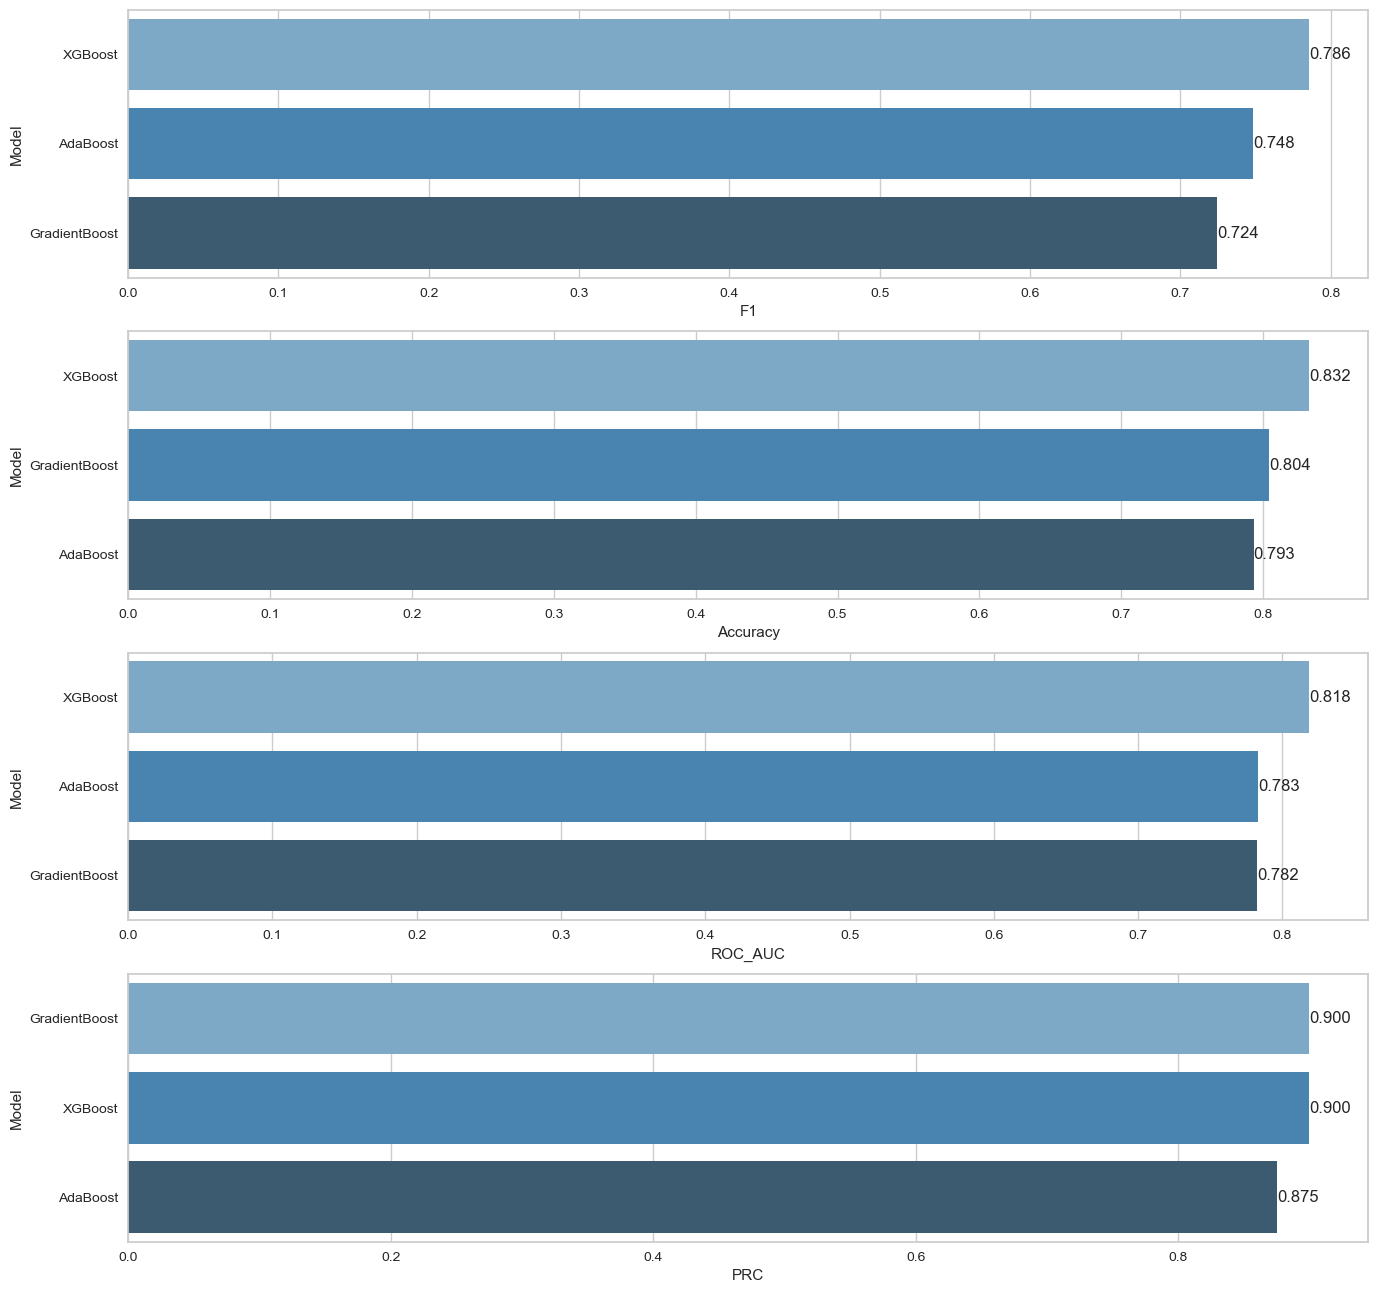

In [94]:
compare = pd.DataFrame({"Model": ["AdaBoost", "GradientBoost", "XGBoost"],
                        "Accuracy": [ada_accuracy_test, grb_accuracy_test, xgb_accuracy_test],
                        "F1": [ada_f1_test, grb_f1_test, xgb_f1_test],
                        "ROC_AUC": [ada_auc, grb_auc, xgb_auc],
                        "PRC": [ada_prc, grb_prc, xgb_prc]})

def labels(ax):
    for p in ax.patches:
        width = p.get_width()                        # get bar length
        ax.text(width,                               # set the text at 1 unit right of the bar
                p.get_y() + p.get_height() / 2,      # get Y coordinate + X coordinate / 2
                '{:1.3f}'.format(width),             # set variable to display, 2 decimals
                ha = 'left',                         # horizontal alignment
                va = 'center')                       # vertical alignment
    
plt.figure(figsize=(16,16))

plt.subplot(411)
compare = compare.sort_values(by="F1", ascending=False)
ax=sns.barplot(x="F1", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(412)
compare = compare.sort_values(by="Accuracy", ascending=False)
ax=sns.barplot(x="Accuracy", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(413)
compare = compare.sort_values(by="ROC_AUC", ascending=False)
ax=sns.barplot(x="ROC_AUC", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(414)
compare = compare.sort_values(by="PRC", ascending=False)
ax=sns.barplot(x="PRC", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.show()

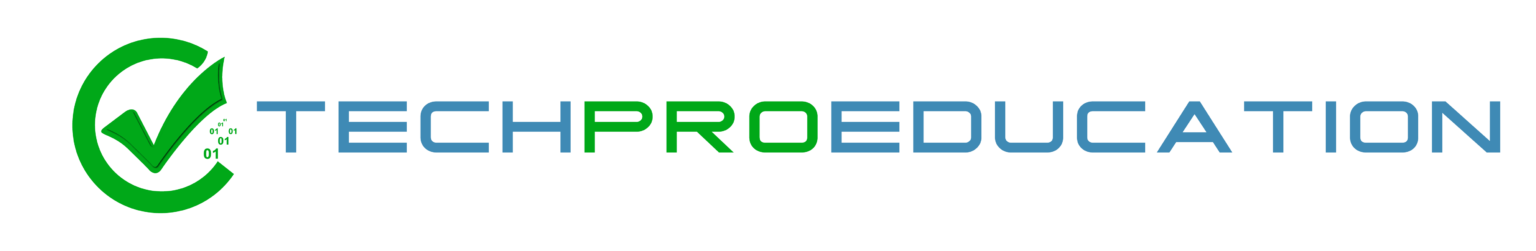